In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

def read_file( filename, n ):
    with open(filename, mode = 'r') as inputfile:
        lines = inputfile.readlines()
    
    lists = [ [] for _ in range(n) ]
    for line in lines:
        data = line.split()
        
        for i in range(n):
            lists[i].append(data[i])
            
    return lists

def plot_spectrum( freqs, spectra, total, colors, title ):
    fig = plt.figure()
    plt.title(title)
    plt.xlabel(r'$\omega$, cm$^{-1}$')
    plt.ylabel(r'$\alpha$, cm$^{-1} \cdot$ amagat$^{-2}$')
    for frq, spectrum, color in zip(freqs, spectra, colors):
        plt.plot(frq, spectrum, color, lw = 2.0)
    
    plt.plot(frq, total, 'r', lw = 2.0)
    plt.grid(linestyle = ':', alpha = 0.7)

In [2]:
from os import listdir
from os.path import isfile, join

path = '50000/'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]

v0_min = 200.0
v0_max = 4600.0
b_min = 0.0
b_max = 4e-10
npoints = 500
coeff = (v0_max - v0_min) * (b_max - b_min) / npoints

freqs = []
spectra_by_500 = []
for f in files:
    freq, spectrum = read_file(f, 2)
    spectrum = [ float(s) * coeff for s in spectrum]
    freqs.append(freq)
    spectra_by_500.append(spectrum)

Расчет произведен по 50.000 траекториям. 500 подряд рассчитанных траекторий собраны в блоки, по ним посчитаны спектры. Красным отмечен итоговый усредненный спектр, серым -- спектры с блоков.

In [3]:
def chunker(seq, size):
    return (tuple(seq[pos:pos+size]) for pos in xrange(0, len(seq), size))        
        
def mean( group ):
    return np.mean(group, axis = 0)
        
def group_by( lists, size ):
    res = []
   
    for group in chunker(range(len(lists)), size):
        res.append( mean([lists[g] for g in group]) )
    
    return res

<IPython.core.display.Javascript object>


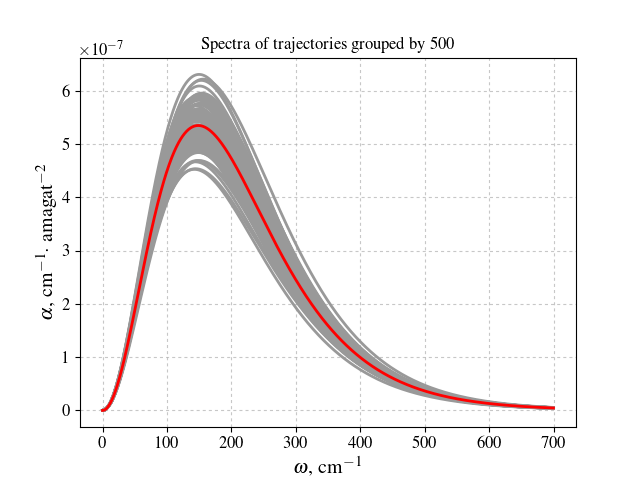

In [4]:
spectra_final = group_by( spectra_by_500, 100 )[0]

colors = ['0.6'] * len(freqs)
plot_spectrum( freqs, spectra_by_500, spectra_final, colors, 'Spectra of trajectories grouped by 500')

Сгруппируем блоки по несколько штук, усредняя спектры между блоками. Сначала объединим каждые два подряд идущих блока (1 и 2, 3 и 4 и т.д.) в блоки по 1000 траекторий. Построим аналогичный график, где серым отмечены спектры по все большего размера блоков.

<IPython.core.display.Javascript object>


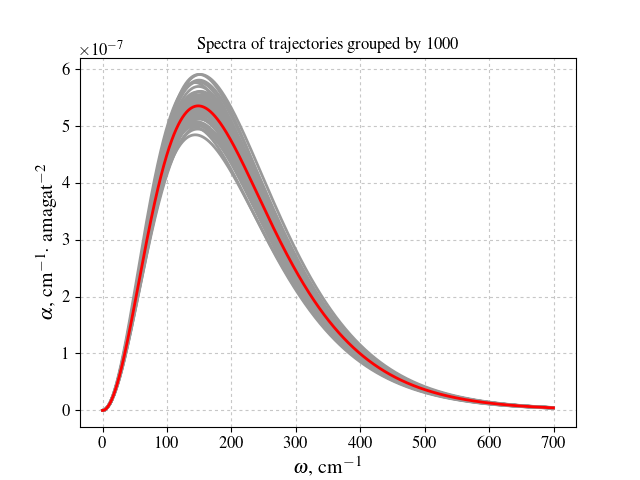

In [5]:
spectra_by_1000 = group_by( spectra_by_500, 2 )
colors = ['0.6'] * len(spectra_by_1000)
plot_spectrum( freqs, spectra_by_1000, spectra_final, colors, 'Spectra of trajectories grouped by 1000' )

<IPython.core.display.Javascript object>


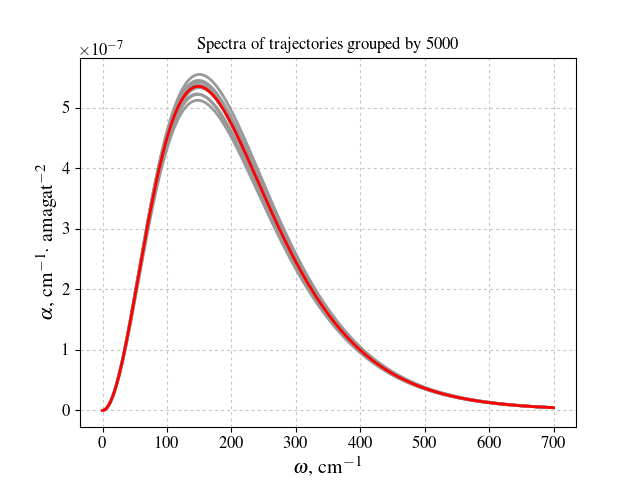

In [6]:
spectra_by_5000 = group_by( spectra_by_500, 10 )
colors = ['0.6'] * len(spectra_by_5000)
plot_spectrum( freqs, spectra_by_5000, spectra_final, colors, 'Spectra of trajectories grouped by 5000' )

<IPython.core.display.Javascript object>


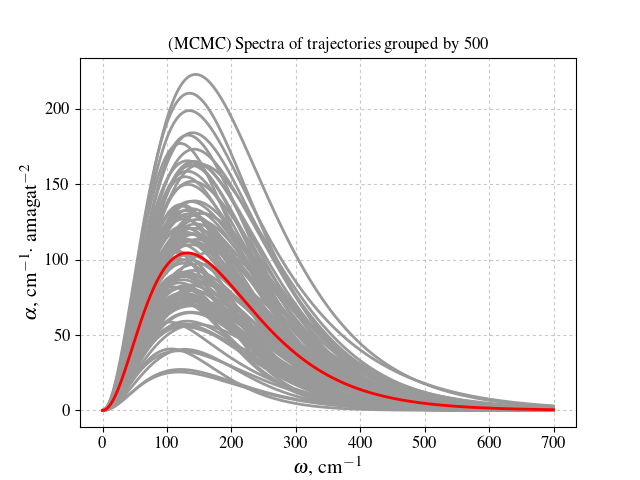

<IPython.core.display.Javascript object>


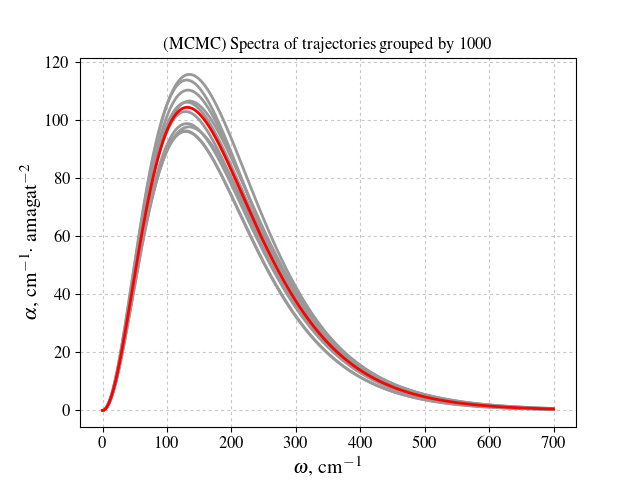

<IPython.core.display.Javascript object>


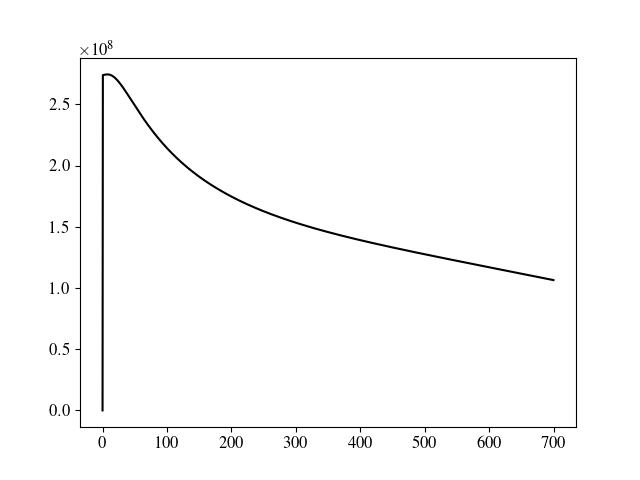

<IPython.core.display.Javascript object>


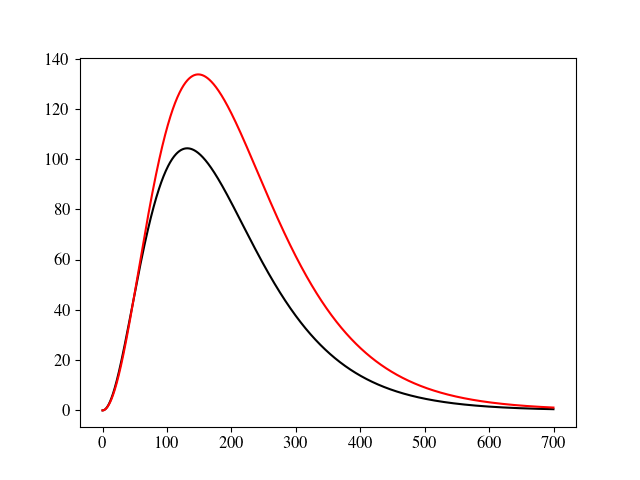

In [20]:
freqs = []
spectra_mcmc_by_500 = []

path = 'mcmc/50000/'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]

for f in files:
    freq, spectrum = read_file(f, 2)
    spectrum = [ float(s) * coeff for s in spectrum]
    freqs.append(freq)
    spectra_mcmc_by_500.append(spectrum)
    
spectra_mcmc_final = group_by( spectra_mcmc_by_500, 100 )[0]

colors = ['0.6'] * len(freqs)
plot_spectrum( freqs, spectra_mcmc_by_500, spectra_mcmc_final, colors, '(MCMC) Spectra of trajectories grouped by 500')

spectra_mcmc_by_5000 = group_by( spectra_mcmc_by_500, 10 )
colors = ['0.6'] * len(spectra_mcmc_by_5000)
plot_spectrum( freqs, spectra_mcmc_by_5000, spectra_mcmc_final, colors, '(MCMC) Spectra of trajectories grouped by 1000' )

relation = [ val1/val2 for val1, val2 in zip(spectra_mcmc_final[1:], spectra_final[1:])]
relation = [ 0.0 ] + relation
fig = plt.figure()
plt.plot(freq, relation, color = 'k')

plt.figure()
plt.plot( freq, spectra_mcmc_final, color = 'k' )
plt.plot( freq, [v * 2.5*10**8 for v in spectra_final], color = 'r')
    